In [27]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()


#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/tmp_/GOCI_03.png"


#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/C1_20230116015105_10110_00006119_L1G_PRGB_georeferencing_32652.tif"


#------ image 
args.img_path = i_1
args.infer_threshold = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])


args.img_output = args.img_path + "_output.png"
#args.img_ais_output = f"/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20221116043234_42197_00003605_L1G/K3_20231115042854_61334_09361262_L1G_PRGB_ais.png"
#args.img_mask = "/mnt/hdd/eric/.tmp_ipy/00.Data/Masks/land_mask_K3_20231115042854_61334_09361262_L1G_PRGB.png"


#------ AIS csv 
args.data_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202301161000.csv"

# time (위성시간) 에서 9시간 더해줘야한다. # 2022 11 16 04 3234
args.year_= 2023
args.month_ = 1
args.day_ = 16
hour_ = 1
args.hour_ = hour_ + 9
args.min  = 51
args.sec =  5
# time gap
args.time_gap_min = 5
args.time_gap_sec = False

# pixel gap 
# this is for visualization
args.pixel_gap = 200

#------ Coordinates filtering function
args.txt_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/1RCoordinate.txt"

#------ TIF 
args.tf_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/C1_20230116015105_10110_00006119_L1G_PRGB.tif"

#------ operation
args.model_run=True
args.gpu_id = 0

# Save EasyDict to a file
file_path = os.path.join(source_root ,"config_25.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

In [28]:
# Load EasyDict from the file
with open(file_path, 'r') as json_file:
    loaded_args = EasyDict(json.load(json_file))
print(loaded_args)

{'img_path': '/mnt/hdd/eric/.tmp_ipy/00.Data/tmp_/GOCI_03.png', 'infer_threshold': 0.2, 'img_output': '/mnt/hdd/eric/.tmp_ipy/00.Data/tmp_/GOCI_03.png_output.png', 'data_path': '/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202301161000.csv', 'year_': 2023, 'month_': 1, 'day_': 16, 'hour_': 10, 'min': 51, 'sec': 5, 'time_gap_min': 5, 'time_gap_sec': False, 'pixel_gap': 200, 'txt_path': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/1RCoordinate.txt', 'tf_path': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/C1_20230116015105_10110_00006119_L1G_PRGB.tif', 'model_run': True, 'gpu_id': 0}


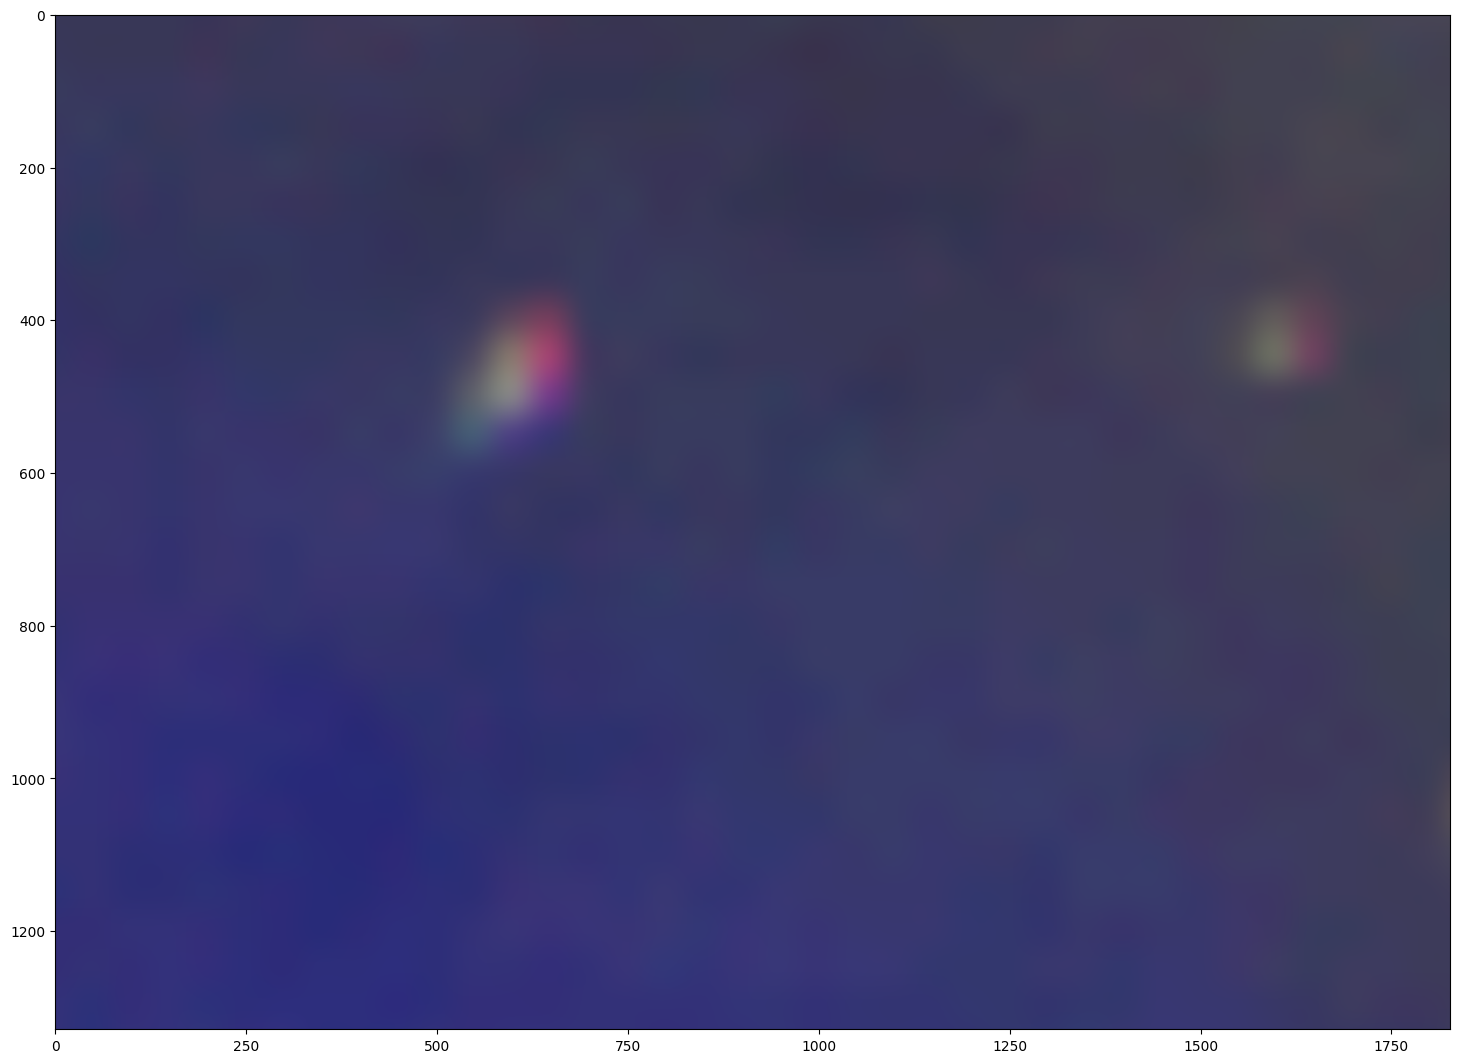

In [29]:
import matplotlib.pyplot as plt
from PIL import Image


img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)

# 1. Model Inference

In [30]:
import testModule

if args.model_run:
    result = testModule.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold ,gpu_id = args.gpu_id)


/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: /mnt/hdd/eric/.tmp_ipy/00.Checkpoint/ship_tmp/epoch_9.pth
model to device #-----------------------------# :  cuda:0
#------------------- init detection
inference_detector_by_patches GPU ! :  cuda:0


/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


In [31]:
len(result)

1

In [32]:
len(result[0])

0

In [33]:
# import numpy as np
# result = np.load("/mnt/hdd/eric/.tmp_ipy/00.Data/tmp_/roi_trans_multilabel-epoch-40_mergeiou-0.1_scroethr-0.2_0119.npy",allow_pickle=True)

# Only Detection

0.001


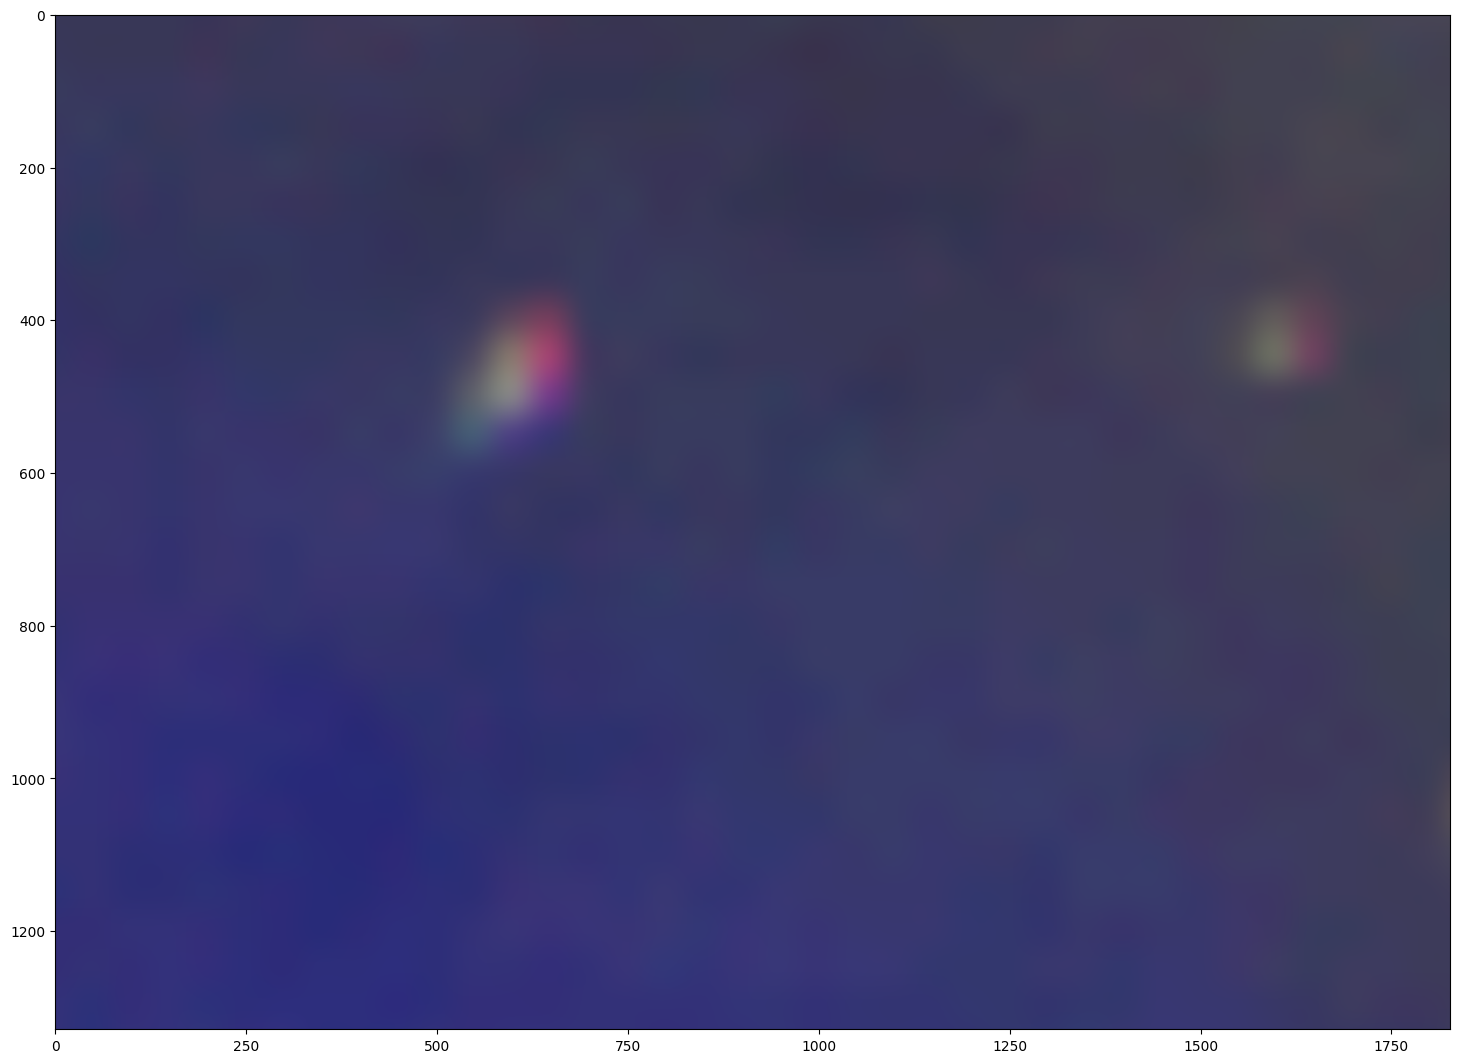

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000
thr =0.001

# for i in range(0,5):
print(thr)


img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)

ax = plt.gca()


bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > thr:
        cnt+=1
        bboxes_.append(r)
#result[0][-1][-1]


for box_ in bboxes_:
    x = box_[0]
    y = box_[1]
    width = box_[2]
    height = box_[3]
    angle_ = box_[4]

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 

    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)


plt.savefig(f"/mnt/hdd/eric/.tmp_ipy/00.Data/tmp_/GOCI_result_03.png",dpi =1200 )
#plt.imsave(out_png_path, img_temp)
#plt.show()

In [ ]:
bboxes_[0].__len__()

6

In [ ]:
for i in range(bboxes_[0].__len__()):
    print(bboxes_[0][i])


3272.4087
836.93463
62.892277
15.60196
1.2801057
0.87018377


In [6]:
for q in result[0][0]:
    print(q)

3272.4087
836.93463
62.892277
15.60196
1.2801057
0.87018377


# 2. AIS csv 

- time condition 에 맞게 filtering 

In [ ]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [ ]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2022-11-16 13:22:34
now :  2022-11-16 13:32:34
late :  2022-11-16 13:42:34


In [ ]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [ ]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [ ]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [ ]:
t_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
16640,440120430,2022-11-16 13:22:35,129.028672,35.095717,511,-128.0,0.5,2022-11-16 13:22:35
16641,440002690,2022-11-16 13:22:35,129.050983,35.119247,123,-0.0,0.0,2022-11-16 13:22:35
16642,440233000,2022-11-16 13:22:35,129.049083,35.116000,308,0.0,102.3,2022-11-16 13:22:35
16643,440208550,2022-11-16 13:22:35,129.245967,35.046328,511,-128.0,8.5,2022-11-16 13:22:35
16644,440145430,2022-11-16 13:22:35,129.025597,35.095050,511,-128.0,0.2,2022-11-16 13:22:35
...,...,...,...,...,...,...,...,...
32790,440054090,2022-11-16 13:42:33,129.067652,35.096547,33,0.0,0.0,2022-11-16 13:42:33
32791,440150210,2022-11-16 13:42:33,129.089627,35.029503,511,-128.0,11.9,2022-11-16 13:42:33
32792,440118750,2022-11-16 13:42:33,129.068613,35.110027,330,-128.0,0.0,2022-11-16 13:42:33
32793,440199850,2022-11-16 13:42:33,129.053582,35.121550,511,-128.0,0.0,2022-11-16 13:42:33


# 3. Coordinates filtering


In [ ]:
# Coordinates filtering function ! 

txt_path = args.txt_path
f = open(txt_path,'r')
lines = f.readlines()
lines

top_left =     lines[1]
bottom_right = lines[-1]

min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

print(min_long,max_long,min_lat,max_lat)

128.812537 129.039512 34.8552978 34.9416529


In [ ]:
max(t_df['long'].values)

181.0

In [ ]:
# # image coord 


#         <ImageGeogTL>
#           <Latitude>35.164445899</Latitude>
#           <Longitude>128.589001424</Longitude>
#         <ImageGeogTR>
#           <Latitude>35.165062633</Latitude>
#           <Longitude>128.860394281</Longitude>
#         <ImageGeogBL>
#           <Latitude>34.984176060</Latitude>
#           <Longitude>128.589904325</Longitude>
#         <ImageGeogBR>
#           <Latitude>34.984788706</Latitude>
#           <Longitude>128.860700983</Longitude>


# #--- 이번만 예외 
# import numpy as np 
# min_long = np.min(t_df['long'].values)
# max_long = max(t_df['long'].values)

# min_lat = np.min(t_df['lat'].values)
# max_lat = max(t_df['lat'].values)

# #----

# min_long = 128.589001424
# max_long = 128.860700983

# min_lat = 34.984176060
# max_lat = 35.165062633


In [ ]:
# xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341262_L1G_PS/K3_20231028043354_61071_09341262_L1G_Aux.xml"
# import xml.etree.ElementTree as ET
# tree = ET.parse(xml_path)
# root = tree.getroot()
# datas = root.getchildren()

In [ ]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [ ]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
16648,440155020,2022-11-16 13:22:35,128.989567,34.882692,511,-128.0,16.2,2022-11-16 13:22:35
16651,440800029,2022-11-16 13:22:35,129.001748,34.912697,281,-128.0,12.0,2022-11-16 13:22:35
16758,440800029,2022-11-16 13:22:42,129.001293,34.912775,283,-128.0,11.7,2022-11-16 13:22:42
16836,440155020,2022-11-16 13:22:48,128.989420,34.883613,511,-128.0,14.7,2022-11-16 13:22:48
16848,440800029,2022-11-16 13:22:49,129.000910,34.912855,285,127.0,11.7,2022-11-16 13:22:49
...,...,...,...,...,...,...,...,...
31724,440155020,2022-11-16 13:41:07,128.986022,34.960805,511,-128.0,15.9,2022-11-16 13:41:07
31741,440273000,2022-11-16 13:41:09,129.036070,34.910047,31,14.0,10.7,2022-11-16 13:41:09
32255,440273000,2022-11-16 13:41:49,129.037332,34.911760,37,2.0,10.6,2022-11-16 13:41:49
32587,440800029,2022-11-16 13:42:16,128.922275,34.934097,285,-128.0,12.1,2022-11-16 13:42:16


In [ ]:
# # xy => find coordinates in TIFF 
# from PIL import Image
# import numpy as np 
# Image.MAX_IMAGE_PIXELS = 933120000
# img_path  = args.img_path 

# img_ = Image.open(img_path)

# np.array(img_).shape

In [ ]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


<ipython-input-167-06a44a921bcb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
<ipython-input-167-06a44a921bcb>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
<ipython-input-167-06a44a921bcb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_duplicates(i

In [ ]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,440155020,2022-11-16 13:22:35,128.989567,34.882692,511,-128.0,16.2,2022-11-16 13:22:35,"(499046.61479293014, 3860034.2288588546, 52, N)","(4440, 7347)"
1,440800029,2022-11-16 13:22:35,129.001748,34.912697,281,-128.0,12.0,2022-11-16 13:22:35,"(500159.6771228282, 3863361.5648923516, 52, N)","(2927, 7853)"
2,440800029,2022-11-16 13:22:42,129.001293,34.912775,283,-128.0,11.7,2022-11-16 13:22:42,"(500118.11345797044, 3863370.214040025, 52, N)","(2924, 7834)"
3,440155020,2022-11-16 13:22:48,128.989420,34.883613,511,-128.0,14.7,2022-11-16 13:22:48,"(499033.19246980624, 3860136.36369854, 52, N)","(4393, 7341)"
4,440800029,2022-11-16 13:22:49,129.000910,34.912855,285,127.0,11.7,2022-11-16 13:22:49,"(500083.12694700673, 3863379.0852233437, 52, N)","(2919, 7818)"
...,...,...,...,...,...,...,...,...,...,...
189,440155020,2022-11-16 13:41:07,128.986022,34.960805,511,-128.0,15.9,2022-11-16 13:41:07,"(498723.8764493638, 3868696.591332593, 52, N)","(502, 7200)"
190,440273000,2022-11-16 13:41:09,129.036070,34.910047,31,14.0,10.7,2022-11-16 13:41:09,"(503295.0452111559, 3863068.28643775, 52, N)","(3061, 9278)"
191,440273000,2022-11-16 13:41:49,129.037332,34.911760,37,2.0,10.6,2022-11-16 13:41:49,"(503410.259855396, 3863258.291109105, 52, N)","(2974, 9330)"
192,440800029,2022-11-16 13:42:16,128.922275,34.934097,285,-128.0,12.1,2022-11-16 13:42:16,"(492901.7825291167, 3865737.46913744, 52, N)","(1847, 4554)"


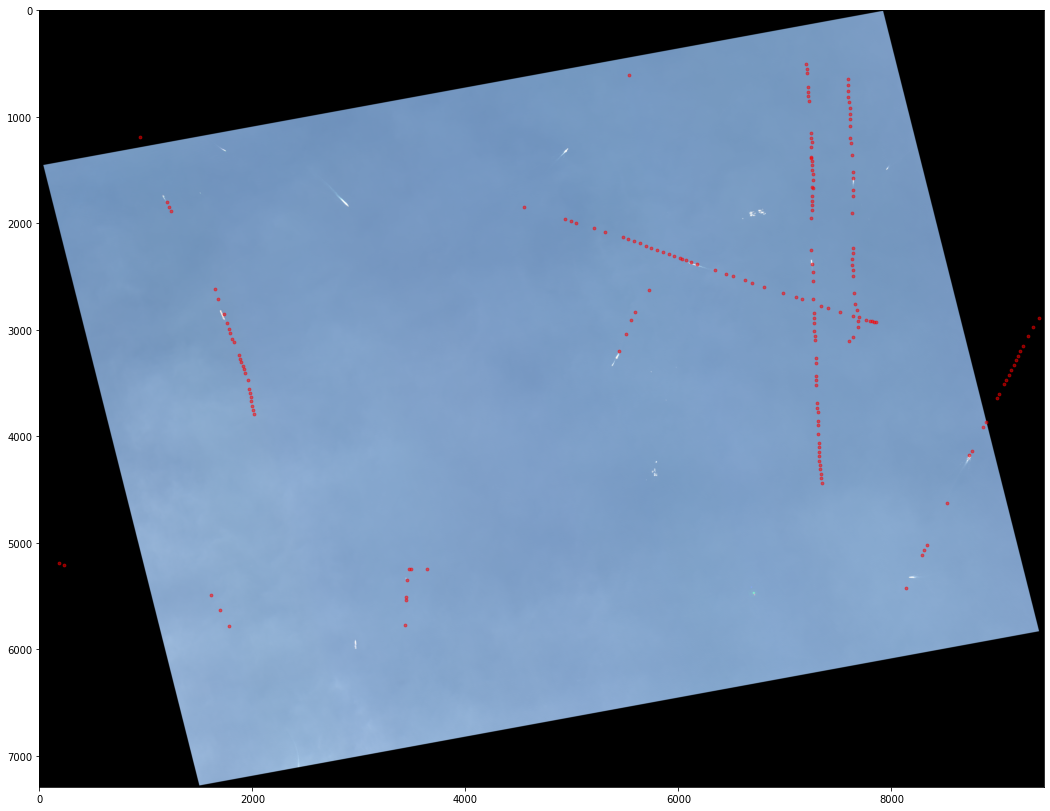

In [ ]:
#------------------------------
# All AIS points 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
from adjustText import adjust_text



# Image size unlimit 
Image.MAX_IMAGE_PIXELS = 933120000

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()



x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]

# Draw matched AIS 
plt.scatter(x_ais,y_ais, alpha=0.5,color='red',marker='o',s=8)
plt.savefig(args.img_ais_output,dpi =600 )
plt.show()
#-----------------------------

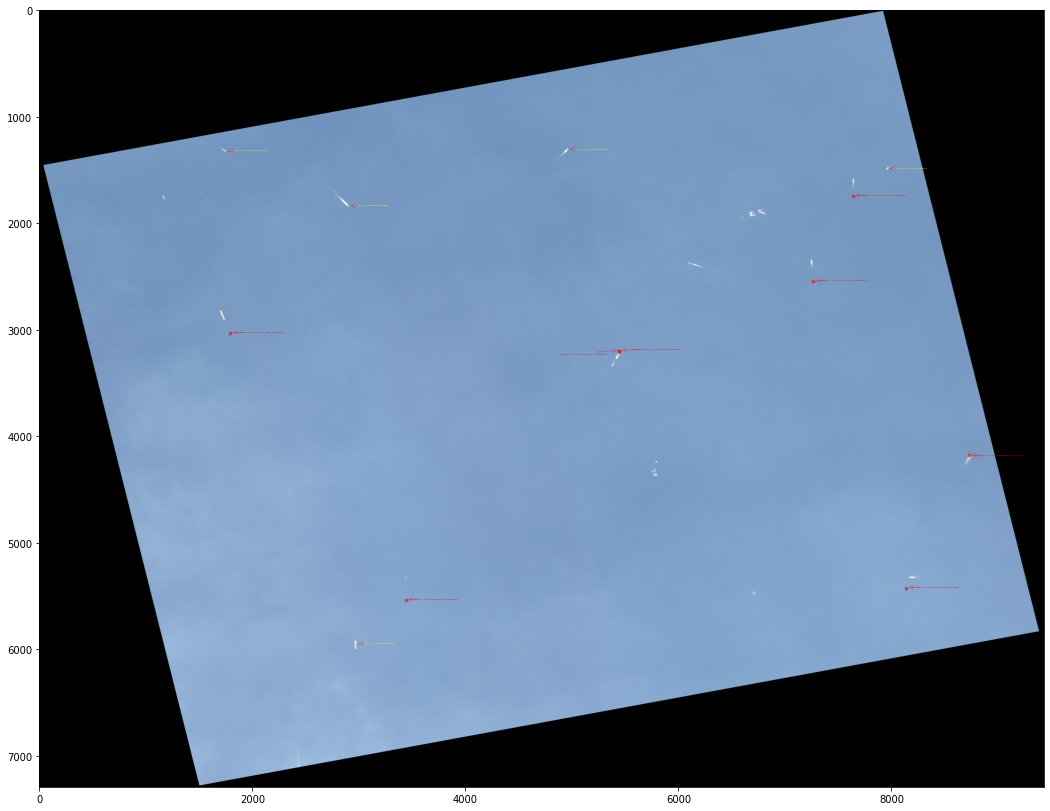

In [ ]:
#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
from adjustText import adjust_text


# Image size unlimit 
Image.MAX_IMAGE_PIXELS = 933120000

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()


# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold:
        cnt+=1
        bboxes_.append(r)


#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []


# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]

idx_ais = [i for i in q_df.index.values]
time_ais = [i[1:-1] for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_ in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            cnt+=1


#-----------------
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

T_ = pd.DataFrame({
    "box index" : idx_bboxes,
    "bbox x coord" : x_bboxes,
    "bbox y coord" : y_bboxes,
    "bbox width" : width_bboxes,
    "bbox height" : height_bboxes,
    "bbox angle" : angle_bboxes,
    "ais x coord(pixel)" : x_matched_ais,
    "ais y coord(pixel)" : y_matched_ais, 
    "ais lat"   : lat_matched_ais,
    "ais long"  : long_matched_ais,
    "ais time" : time_matched_ais
})

T_.drop_duplicates(inplace=True)

S_ = {
    'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
    'bbox x coord' : [],
    'bbox y coord' : [],
    'bbox width' : [],
    'bbox height' : [],
    'bbox angle' :[],
    "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    }

not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

for a in not_include_boxes:
    box_ = bboxes_[a]
    
    S_['bbox x coord'].append(box_[0])
    S_['bbox y coord'].append(box_[1])
    S_['bbox width'].append(box_[2])
    S_['bbox height'].append(box_[3])
    S_['bbox angle'].append(box_[4])

S_ = pd.DataFrame(S_)

M_ = pd.concat([T_,S_])
del M_["box index"]
M_.reset_index(inplace=True,drop=True)


#----------------
# Draw matched AIS 
plt.scatter(x_matched_ais,y_matched_ais, alpha=0.5,color='red',marker='o',s=8)


#--------------------------------------------
# among the matched AIS (q_df), label and draw them 
plt_txts = []



for i,row in M_.iterrows():
    
    a = row['ais lat']
    b = row['ais long']

    x = row['ais x coord(pixel)']
    y = row['ais y coord(pixel)']


    if (x ==0) & (y ==0):
        x = row['bbox x coord']
        y = row['bbox y coord']
        name = f'bbox idx : {i}, No matched AIS point'
        plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

    else:
        name = f'bbox idx : {i}, ais coord: {a,b}'
        plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


#----------------------------------------
# label overlap avoid 
adjust_text(plt_txts, arrowprops={'arrowstyle' : '->', 
                                  'color' : 'crimson',  
                                  'alpha' : 0.3
                                  },
                                  force_points=5)

#---------
# png save and draw
plt.savefig(args.img_output,dpi =600 )
plt.show()

In [ ]:
M_

,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1721.324463,2861.855957,93.458641,17.647741,1.164236,1792,3029,34.910592,128.855775,022-11-16 13:30:5
1,8719.770508,4211.450195,83.283737,14.523374,-0.997792,8732,4179,34.887865,129.022912,022-11-16 13:32:5
2,5429.994141,3244.384033,62.385994,15.138985,-1.080058,5446,3194,34.907405,128.943787,022-11-16 13:30:5
3,5377.599121,3338.288574,9.166977,6.713128,-1.136673,5446,3194,34.907405,128.943787,022-11-16 13:30:5
4,3443.887939,5334.179199,19.436834,6.254705,1.464840,3438,5532,34.860972,128.895490,022-11-16 13:29:2
5,8178.560547,5322.213867,34.600033,12.913077,0.091475,8139,5419,34.863260,129.008643,022-11-16 13:23:2
6,7249.384766,2358.541016,31.343014,13.320135,1.352059,7264,2540,34.920392,128.987572,022-11-16 13:31:3
7,7641.251953,1620.034668,73.874962,11.405896,-1.480505,7636,1739,34.936267,128.996530,022-11-16 13:31:3
8,2970.742432,5949.578125,79.763847,16.457092,1.517586,0,0,0.000000,0.000000,0
9,7959.853027,1486.024292,35.430603,10.512325,-0.974265,0,0,0.000000,0.000000,0


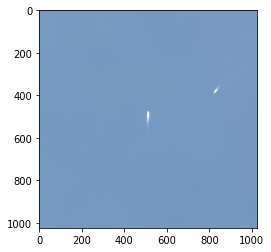

In [ ]:
#---- Chip Set making 
import os 
img_part = Image.open(img_path)

for i,row in M_.iterrows():

    if row["ais time"] != 0:
        box_ = row
        x = box_["bbox x coord"]
        y = box_["bbox y coord"]
        width =  box_["bbox width"]
        height = box_["bbox height"]
        angle_ = box_["bbox angle"]

        pixel_slice = 512
        a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
        #plt.figure(figsize=(18,18))
        
        folder_ = "/mnt/hdd/eric/.tmp_ipy/00.Data/Chips"
        saved_name = f"{i}.png"
        
        
        #plt.figure(figsize=(18,18))
        #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
        a_.save(os.path.join(folder_,saved_name))
        plt.imshow(a_)
    

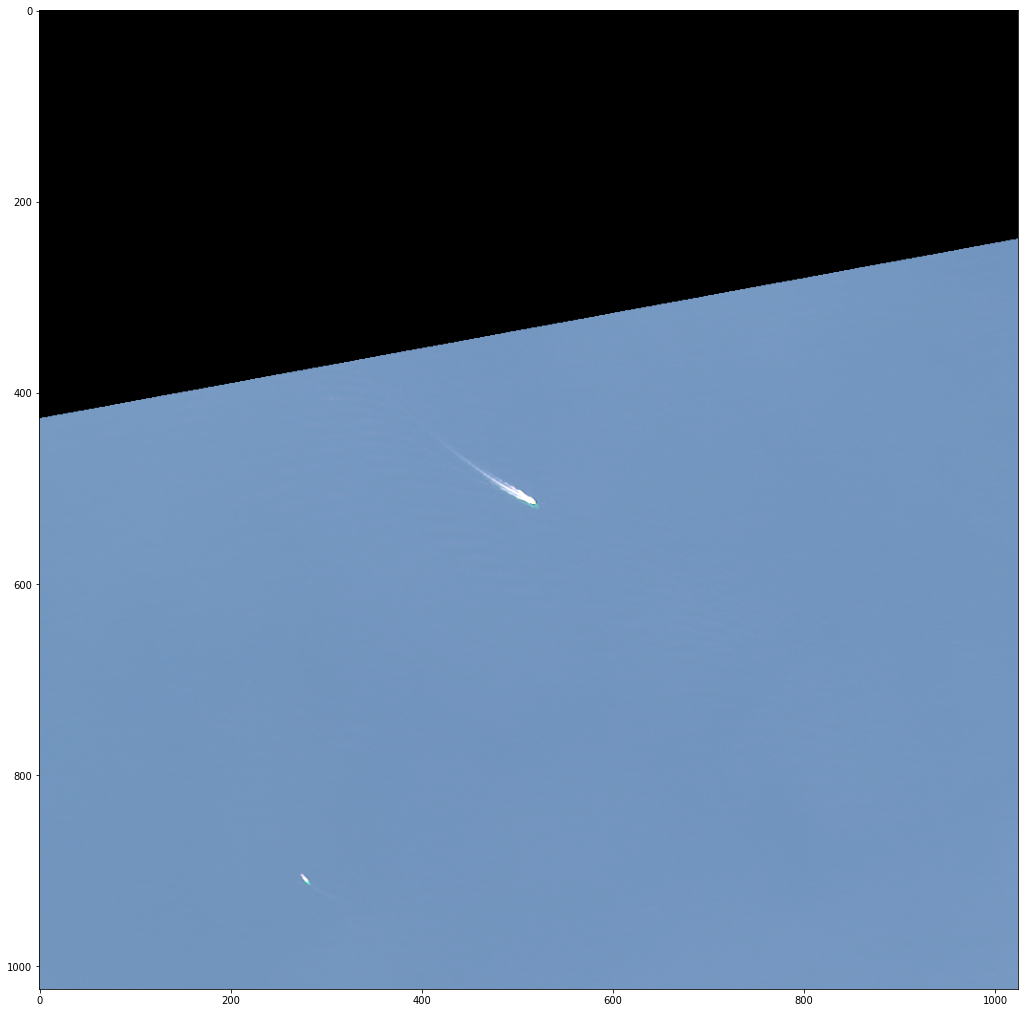

In [ ]:
#----
img_part = Image.open(img_path)
#img_part = img_part.load()
#---

pixel_slice = 512
a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
plt.figure(figsize=(18,18))
plt.savefig(args.img_output,dpi =600 )
plt.imshow(a_)


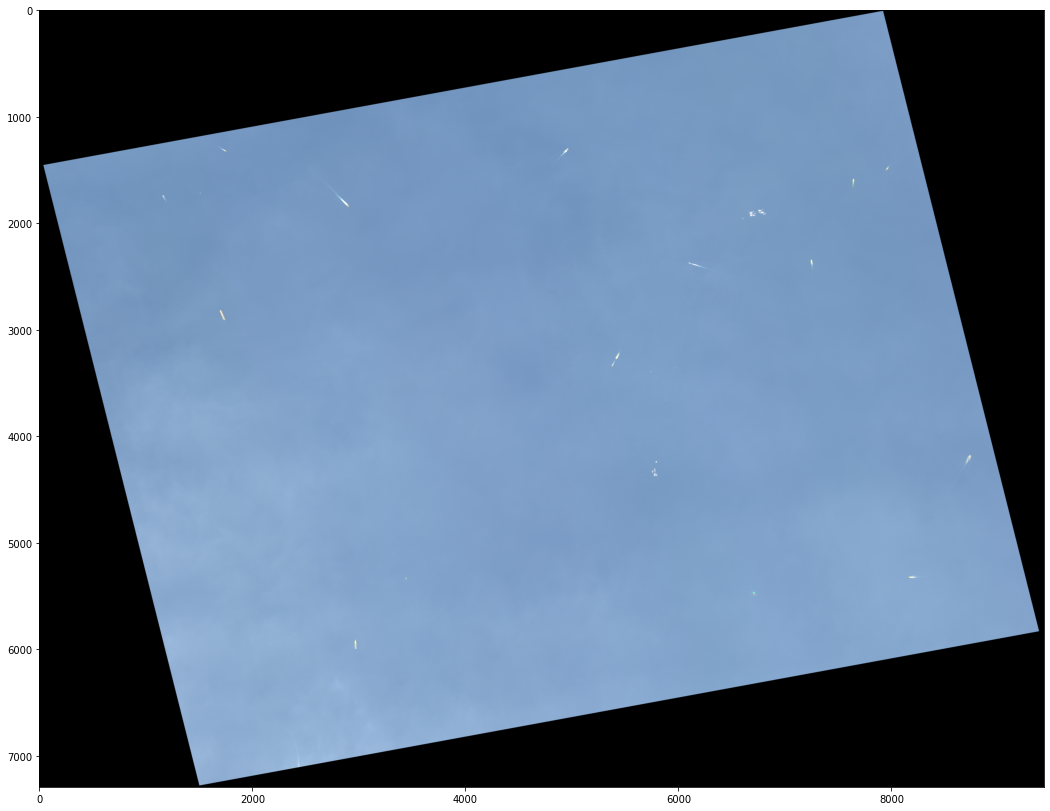

In [ ]:
# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()


for i,row in M_.iterrows():
    box_ = row
    x = box_["bbox x coord"]
    y = box_["bbox y coord"]
    width =  box_["bbox width"]
    height = box_["bbox height"]
    angle_ = box_["bbox angle"]
     
    
    # path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="yellow", fill=False,
    #                             rotation_point="center",
    #                             angle=angle_*180/np.pi)
    
    # ax.add_patch(path_obj)
    

    
plt.savefig("./testing_box.png",dpi =300 )
plt.show()

In [ ]:
for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

In [ ]:
M_[0:19]

,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1721.324463,2861.855957,93.458641,17.647741,1.164236,1792,3029,34.910592,128.855775,022-11-16 13:30:5
1,8719.770508,4211.450195,83.283737,14.523374,-0.997792,8732,4179,34.887865,129.022912,022-11-16 13:32:5
2,5429.994141,3244.384033,62.385994,15.138985,-1.080058,5446,3194,34.907405,128.943787,022-11-16 13:30:5
3,5377.599121,3338.288574,9.166977,6.713128,-1.136673,5446,3194,34.907405,128.943787,022-11-16 13:30:5
4,3443.887939,5334.179199,19.436834,6.254705,1.464840,3438,5532,34.860972,128.895490,022-11-16 13:29:2
5,8178.560547,5322.213867,34.600033,12.913077,0.091475,8139,5419,34.863260,129.008643,022-11-16 13:23:2
6,7249.384766,2358.541016,31.343014,13.320135,1.352059,7264,2540,34.920392,128.987572,022-11-16 13:31:3
7,7641.251953,1620.034668,73.874962,11.405896,-1.480505,7636,1739,34.936267,128.996530,022-11-16 13:31:3
8,2970.742432,5949.578125,79.763847,16.457092,1.517586,0,0,0.000000,0.000000,0
9,7959.853027,1486.024292,35.430603,10.512325,-0.974265,0,0,0.000000,0.000000,0


In [ ]:
import os 
M_.to_csv(os.path.join("/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/[Ship]_AIS_Matching_Result","Ship_Result.csv") )

In [ ]:
".tmp_ipy/00.Reproduction_Test/[Ship]_AIS_Matching_Result/" + args.img_path + ".csv"

'.tmp_ipy/00.Reproduction_Test/[Ship]_AIS_Matching_Result//mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20221116043234_42197_00003605_L1G/K3A_20221116043234_42197_00003605_L1G_RGB.png.csv'